In [63]:
obs=np.load('obs_H128,512__mu=0.2_.npy')  # 128 dimensional
State=np.load('trajectory_flame_{}'.format(n)+'.npy') # 512 dimensional

In [76]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel,WhiteKernel)

kernel1=1*RBF(length_scale=5.0, length_scale_bounds=(1e-1, 10.0))#+WhiteKernel(noise_level=0.2)

kernel2=ExpSineSquared(length_scale=10, periodicity=20)#+WhiteKernel(noise_level=0.2)
kernel3=1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1)
kernel4=1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)

my_gp=GPR(kernel=kernel1,normalize_y=True,alpha=0.2)

RBF:
$$k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$$

Rational quadratic:$$k(x_i, x_j) = \left(
1 + \frac{d(x_i, x_j)^2 }{ 2\alpha  l^2}\right)^{-\alpha}$$

Exponential Sinequared:
$$k(x_i, x_j) = \text{exp}\left(-
\frac{ 2\sin^2(\pi d(x_i, x_j)/p) }{ l^ 2} \right)$$

Matern:
$$k(x_i, x_j) =  \frac{1}{\Gamma(\nu)2^{\nu-1}}\Bigg(
\frac{\sqrt{2\nu}}{l} d(x_i , x_j )
\Bigg)^\nu K_\nu\Bigg(
\frac{\sqrt{2\nu}}{l} d(x_i , x_j )\Bigg)$$


No handles with labels found to put in legend.


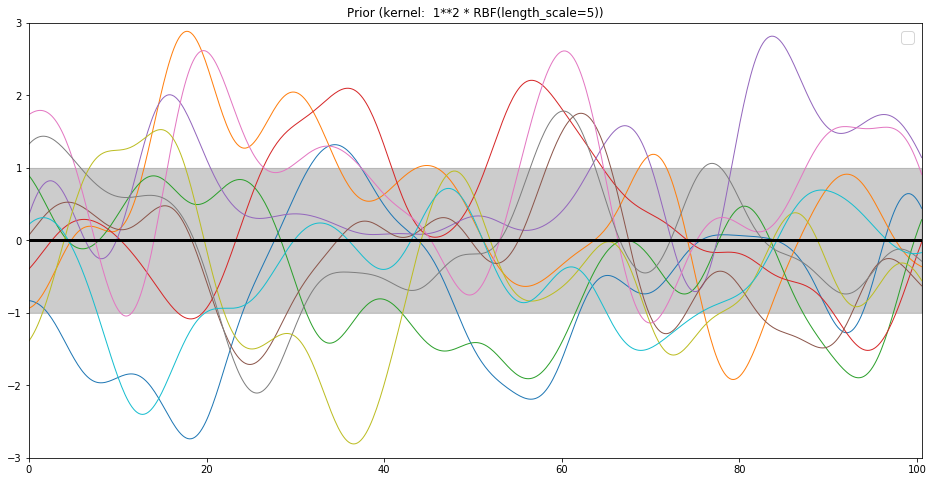

In [77]:
#Now we want to look at some samples from our prior GP:
n=512
L=32*np.pi

plt.figure(figsize=(16, 8))
X_ = np.linspace(0,L,n)
y_mean, y_std = my_gp.predict(X_[:, np.newaxis], return_std=True)
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
y_samples = my_gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
#plt.plot(np.linspace(0,L,128),obs[:,1].real,c='Royalblue',lw=3,label='Obs')
plt.xlim(0, L)
plt.ylim(-3, 3)
plt.title("Prior (kernel:  %s)" % kernel1, fontsize=12)
plt.legend(fontsize=16)

## Noisy Observations:
To take into account noise in the training data,we assume the noise is iid and then,what we have is 
$f\left(x_{t}\right)+\epsilon_{i}$. Again,we repeat the process to determine the joint distriution of the training and the test, only differene being that the joint distribution has covariances modified according to the additional noise taken into account. This gives rise to noise covariance added to the training data points.


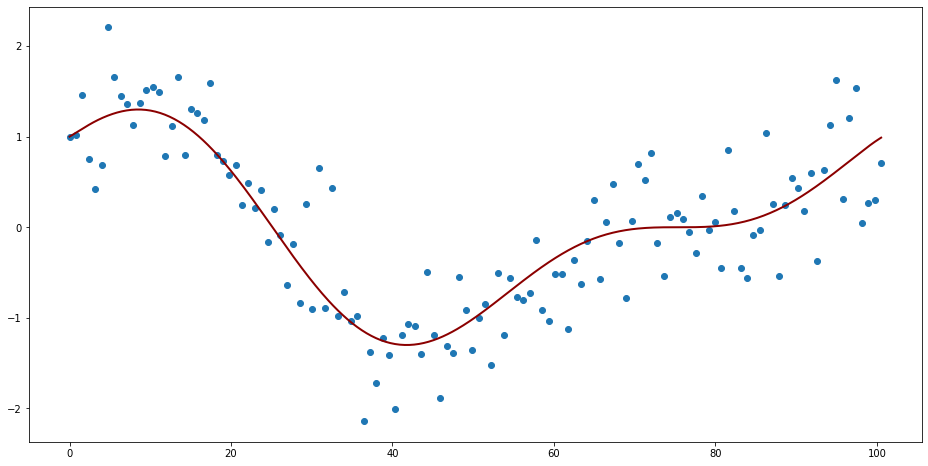

In [78]:
x_,y_=np.linspace(0,L,128),obs[:,1].real
my_gp.fit(x_[:,np.newaxis],y_)
y_gpr, y_std =my_gp.predict(X_[:,np.newaxis], return_std=True)
plt.figure(figsize=(16,8))
plt.scatter(x_,y_)
plt.plot(X_,State[:,1].real,label='True State',c='Darkred',lw=2)

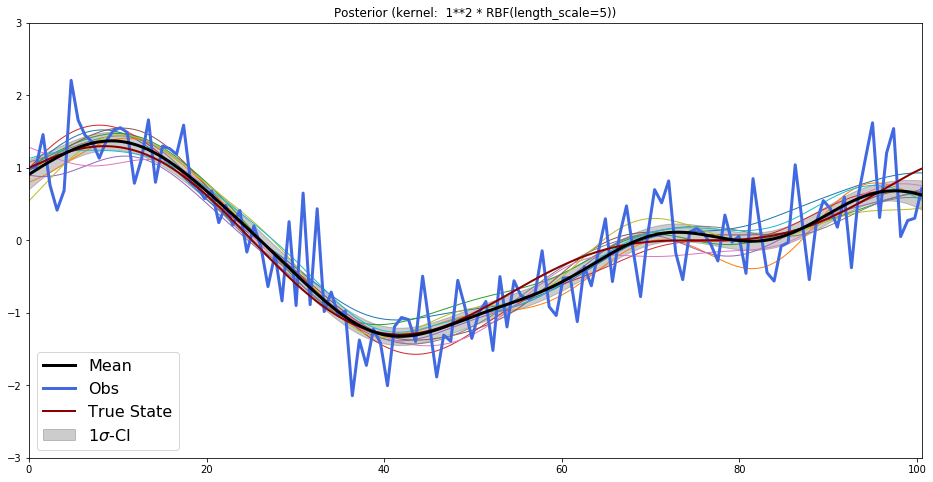

In [79]:
plt.figure(figsize=(16,8))
plt.plot(X_, y_gpr, 'k', lw=3, zorder=9,label='Mean')
plt.fill_between(X_, y_gpr - y_std, y_gpr + y_std,
                     alpha=0.2, color='k',label='1$\sigma $-CI')
y_samples = my_gp.sample_y(X_[:, np.newaxis], 10)
plt.plot(X_, y_samples, lw=1)
plt.plot(np.linspace(0,L,128),obs[:,1].real,c='Royalblue',lw=3,label='Obs')
plt.plot(X_,State[:,1].real,label='True State',c='Darkred',lw=2)
plt.xlim(0, L)
plt.ylim(-3, 3)
plt.title("Posterior (kernel:  %s)" % kernel1, fontsize=12)
plt.legend(fontsize=16)

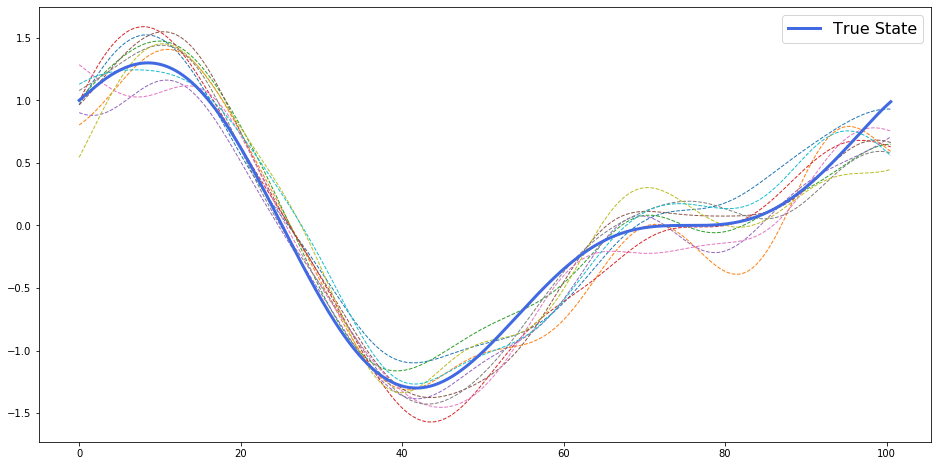

In [80]:
plt.figure(figsize=(16,8))
plt.plot(X_, y_samples, lw=1,linestyle='dashed')
plt.plot(X_,State[:,1].real,label='True State',c='Royalblue',lw=3)
plt.legend(fontsize=16)